# 効率的フロンティア

### まずは自分の設定した資産配分でのリスクとリターンを計算

資産配分を入力してください。リスクとリターンを計算し、グラフ化します

国内債券 の比率を入力 残り 1
0
国内株式 の比率を入力 残り 1.0
0.4
先進国債券 の比率を入力 残り 0.6
0
先進国株式 の比率を入力 残り 0.6
0.6
新興国株式 の比率は 0.0
問題なければEnter



現在の資産配分は以下
 国内債券            :  0.00
 国内株式            :  0.40
 先進国債券          :  0.00
 先進国株式          :  0.60
 新興国株式          :  0.00

 現在のリスク        : 16.52
 現在の期待収益率    :  4.92

リスクとリターンは以下


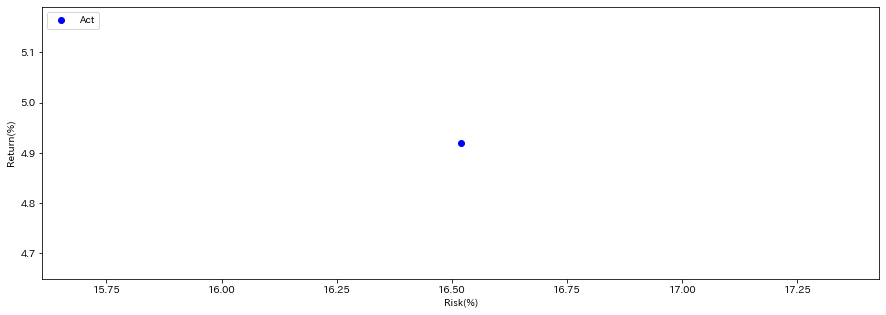

In [1]:
###### 現在の有リスク資産のリスク・リターン計算プログラム====================================
print('資産配分を入力してください。リスクとリターンを計算し、グラフ化します')
print('')

import matplotlib.pyplot as plt 
import numpy as np
import japanize_matplotlib

#======================================================================================
#input data
#5資産の期待収益率、相関係数、標準偏差、無リスク資産リターンに変更があれば更新する
#======================================================================================
sisan=["国内債券","国内株式","先進国債券","先進国株式","新興国株式"] #資産の種類定義
r=[1.00,4.80,3.50,5.00,9.25] #期待収益率
rho=[[1,0.16,-0.06,-0.05,-0.29],
    [0.16,1,-0.25,0.27,0.73],
    [-0.06,-0.25,1,0.56,0.11],
    [-0.05,0.27,0.56,1,0.91],
    [-0.29,0.73,0.11,0.91,1]] #相関係数行列
sigma=[5.4,22.15,13.25,19.59,26.25] #標準偏差
n=len(sisan) #資産の数

#======================================================================================
#現在の資産配分入力
#======================================================================================
x_now=[0]*n #資産の比率を表す配列の器の設定
x_criteria=0
comp=0 #入力完了信号

while comp==0: #資産配分が正しく入力されるまでループ
    for i in range(0,n):
        if i==n-1: #最終ループの際
            if x_criteria>1: #入力値エラー
                print("合計が100%を超えています")
                x_criteria=0
                
            else: 
                x_now[i]=1-x_criteria
                print(sisan[i],"の比率は",round(1-x_criteria,2))
                print("問題なければEnter")
                criteria=input() #資産配分に問題あるか判断
                if criteria=="" : #問題ない場合はループを抜ける
                    comp=1
                    
        
        else:
            print(sisan[i],"の比率を入力 残り",round(1-x_criteria,2))
            x_now[i]=float(input())
            x_criteria=x_criteria+x_now[i]        
            
#======================================================================================
#期待収益率関数の定義
#======================================================================================
def EST_PF_Return(fx):
    PF_Return=0
    for i in range(0,n):
        PF_Return+=r[i]*fx[i]
    
    return PF_Return

#======================================================================================
#標準偏差関数の定義
#======================================================================================
def EST_PF_Sigma(fx):
    PF_Sigma=0
    for i in range(0,n):
        for j in range(0,n):
            PF_Sigma+=rho[i][j]*sigma[i]*sigma[j]*fx[i]*fx[j]
            
    PF_Sigma=np.sqrt(PF_Sigma)
    return PF_Sigma

#======================================================================================
#期待収益率、標準偏差の計算
#======================================================================================
r_now=EST_PF_Return(x_now)
sigma_now=EST_PF_Sigma(x_now)


#======================================================================================
#結果出力
#======================================================================================
print("")
print("")
print("======================================================================================")
print("現在の資産配分は以下")
for i in range(0,n):
    print("",sisan[i],":".rjust(20-2*len(sisan[i])),str('{:.2f}'.format(x_now[i])).rjust(5))
print("")
print("","現在のリスク",":".rjust(20-2*len("現在のリスク")),str('{:.2f}'.format(sigma_now,2)).rjust(5))
print("","現在の期待収益率",":".rjust(20-2*len("現在の期待収益率")),str('{:.2f}'.format(r_now,2)).rjust(5))
print("======================================================================================")
print("")
print("リスクとリターンは以下")

#======================================================================================
#グラフ化
#======================================================================================
fig,ax=plt.subplots(figsize=(15,5)) 
ax.scatter(sigma_now,r_now,c='blue',label='Act') 
ax.legend(loc='upper left')
plt.xlabel("Risk(%)") 
plt.ylabel("Return(%)") 
plt.show()


### 効率的フロンティア計算プログラム

目標リターンを入力すると、最適資産配分を計算します
5.21


目標リターン 5.21 %での最適ポートフォリオは以下
 国内債券            :  0.20
 国内株式            :  0.00
 先進国債券          :  0.40
 先進国株式          :  0.00
 新興国株式          :  0.40

 リスク              :  5.30
 期待収益率          : 12.02


目標リターン 2.0 %での最適ポートフォリオは以下(右の数字はstock only)
 国内債券            :  0.73 /  0.00
 国内株式            :  0.00 /  0.40
 先進国債券          :  0.20 /  0.00
 先進国株式          :  0.00 /  0.60
 新興国株式          :  0.07 /  0.00

 リスク              :  4.64 / 16.52
 期待収益率          :  2.05 /  4.92
目標リターン 3.0 %での最適ポートフォリオは以下(右の数字はstock only)
 国内債券            :  0.53 /  0.00
 国内株式            :  0.07 /  0.40
 先進国債券          :  0.27 /  0.00
 先進国株式          :  0.00 /  0.60
 新興国株式          :  0.13 /  0.00

 リスク              :  6.10 / 16.52
 期待収益率          :  3.02 /  4.92
目標リターン 4.0 %での最適ポートフォリオは以下(右の数字はstock only)
 国内債券            :  0.40 /  0.00
 国内株式            :  0.00 /  0.40
 先進国債券          :  0.33 /  0.00
 先進国株式          :  0.00 /  0.60
 新興国株式          :  0.27 /  0.00

 リスク       

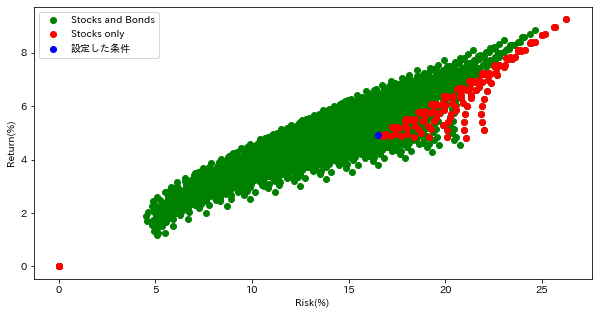

In [2]:
#資産の取りうるリスク・リターン計算プログラム===========================
import matplotlib.pyplot as plt 
import numpy as np

#=======================================================================
#条件設定
#期待収益率、投資比率の精度、資産の数に変更があれば更新する
#=======================================================================
print("目標リターンを入力すると、最適資産配分を計算します")
rmin=input() #目標リターン
rmin=float(rmin)
nmax=15 #投資比率の精度
r_nonrisk=0.01

#======================================================================
#文字の定義
#======================================================================
m=0 #全体の計算回数
x=[0]*n #資産の比率を表す配列の器の設定
return_risk=[r_nonrisk]*(nmax**4) #リスク資産のリターン
sigma_risk=[0]*(nmax**4)  #リスク資産の標準偏差
xx0=[0]*(nmax**4)         #資産配分比率
xx1=[0]*(nmax**4)
xx2=[0]*(nmax**4)
xx3=[0]*(nmax**4)
xx4=[0]*(nmax**4)
xmin=[0]*n #xは更新されてしまうので別で保存
sigmap_min=1000000 #適当に大きい数値を設定
err=1e-6 #許容する誤差

r_low=2  #リターン2%以上の効率的ポートフォリオを計算
r_high=8+1 #リターン8%以下の効率的ポートフォリオを計算
n_efficient=5 #1%を何分割で計算するか

#=============================================================================
#資産配分の組み合わせを作成
#=============================================================================
for x0 in range(0,nmax):
    x[0]=x0/nmax
    for x1 in range(0,nmax):
        x[1]=x1/nmax
        count=x[0]+x[1]
        if count>1+err: #投資比率が100%を超えた時
            break       #内側のforを抜ける
        for x2 in range(0,nmax):
            x[2]=x2/nmax
            count=x[0]+x[1]+x[2]
            if count>1+err: #投資比率が100%を超えた時
                break       #内側のforを抜ける
            for x3 in range(0,nmax):
                x[3]=x3/nmax
                count=x[0]+x[1]+x[2]+x[3]
                if count>1+err: #投資比率が100%を超えた時
                    break       #内側のforを抜ける
                x[4]=round(1-count,6)
                
                #============================================================
                #期待収益率の計算
                #============================================================
                rp=EST_PF_Return(x) #関数の使用
                return_risk[m]=rp #リターンの記録
                
                sigmap=EST_PF_Sigma(x) #関数の使用
                sigma_risk[m]=sigmap #リスクの記録
                
                xx0[m]=x[0] #資産配分の記録
                xx1[m]=x[1] #資産配分の記録                
                xx2[m]=x[2] #資産配分の記録                
                xx3[m]=x[3] #資産配分の記録                
                xx4[m]=x[4] #資産配分の記録   
                
                m=m+1 #計算回数の更新
                if sigmap<sigmap_min and rp>=rmin:
                    sigmap_min=sigmap #より小さい値に更新
                    xmin[:]=x[:]      #標準偏差を保存
                    rpt=rp            #期待収益率を更新
                    
#=============================================================================
#効率的ポートフォリオの計算
#=============================================================================
sigma_min=[999]*((n_efficient)*(r_high-r_low)+1) #リターン率jにおける最小標準偏差
return_min=[r_nonrisk]*((n_efficient)*(r_high-r_low)+1)
xx0_min=[0]*((n_efficient)*(r_high-r_low)+1)
xx1_min=[0]*((n_efficient)*(r_high-r_low)+1)
xx2_min=[0]*((n_efficient)*(r_high-r_low)+1)
xx3_min=[0]*((n_efficient)*(r_high-r_low)+1)
xx4_min=[0]*((n_efficient)*(r_high-r_low)+1)

for j in range(r_low*n_efficient,r_high*n_efficient+1): 
    k=j-r_low*n_efficient
    l=j/n_efficient
    for i in range(0,nmax**4-1): #全データを調査
        if sigma_min[k]>sigma_risk[i] and return_risk[i]>=l:
            sigma_min[k]=sigma_risk[i] #より小さい値に更新
            return_min[k]=return_risk[i]
            xx0_min[k]=xx0[i]
            xx1_min[k]=xx1[i]
            xx2_min[k]=xx2[i]
            xx3_min[k]=xx3[i]
            xx4_min[k]=xx4[i]

#=============================================================================
#Full Investmentの計算
#=============================================================================
sigma_full=[0]*(nmax**4) 
return_full=[0]*(nmax**4)
xx0_full=[0]*(nmax**4)
xx1_full=[0]*(nmax**4)
xx2_full=[0]*(nmax**4)
xx3_full=[0]*(nmax**4)
xx4_full=[0]*(nmax**4)           

for j in range (0,nmax**4-1): #全データを調査
    if xx0[j]==0 and xx2[j]==0: #Full Ivestmentの条件判定
            sigma_full[j]=sigma_risk[j]
            return_full[j]=return_risk[j]
            xx0_full[j]=xx0[j]
            xx1_full[j]=xx1[j]
            xx2_full[j]=xx2[j]
            xx3_full[j]=xx3[j]
            xx4_full[j]=xx4[j]

#=============================================================================
#Full Investmentの効率的ポートフォリオの計算
#=============================================================================
sigma_min_full=[999]*((n_efficient)*(r_high-r_low)+1)
return_min_full=[r_nonrisk]*((n_efficient)*(r_high-r_low)+1)
xx0_min_full=[0]*((n_efficient)*(r_high-r_low)+1)
xx1_min_full=[0]*((n_efficient)*(r_high-r_low)+1)
xx2_min_full=[0]*((n_efficient)*(r_high-r_low)+1)
xx3_min_full=[0]*((n_efficient)*(r_high-r_low)+1)
xx4_min_full=[0]*((n_efficient)*(r_high-r_low)+1)

for j in range(r_low*n_efficient,r_high*n_efficient+1):
    k=j-r_low*n_efficient
    l=j/n_efficient
    for i in range(0,nmax**4-1): #全データを調査
        if sigma_min_full[k]>sigma_full[i] and return_full[i]>=l:
            sigma_min_full[k]=sigma_full[i] #より小さい値に更新
            return_min_full[k]=return_full[i]
            xx0_min_full[k]=xx0[i]
            xx1_min_full[k]=xx1[i]
            xx2_min_full[k]=xx2[i]
            xx3_min_full[k]=xx3[i]
            xx4_min_full[k]=xx4[i]

#=============================================================================
#結果出力
#=============================================================================

print("")
print("")
print("======================================================================================")
print("目標リターン",rmin,"%での最適ポートフォリオは以下")
for i in range(0,n):
    print("",sisan[i],":".rjust(20-2*len(sisan[i])),str('{:.2f}'.format(xmin[i])).rjust(5))
print("")
print("","リスク",":".rjust(20-2*len("リスク")),str('{:.2f}'.format(rpt,2)).rjust(5))
print("","期待収益率",":".rjust(20-2*len("期待収益率")),str('{:.2f}'.format(sigmap_min,2)).rjust(5))
print("======================================================================================")
print("")
print("")

for j in range(r_low*n_efficient,r_high*n_efficient+1,n_efficient): #1%間隔での出力
    k=j-r_low*n_efficient
    l=j/n_efficient
    print("======================================================================================")
    print("目標リターン",l,"%での最適ポートフォリオは以下(右の数字はstock only)")
    print("",sisan[0],":".rjust(20-2*len(sisan[0])),str('{:.2f}'.format(xx0_min[k])).rjust(5),
         '/',str('{:.2f}'.format(xx0_min_full[k])).rjust(5))
    print("",sisan[1],":".rjust(20-2*len(sisan[1])),str('{:.2f}'.format(xx1_min[k])).rjust(5),
         '/',str('{:.2f}'.format(xx1_min_full[k])).rjust(5))
    print("",sisan[2],":".rjust(20-2*len(sisan[2])),str('{:.2f}'.format(xx2_min[k])).rjust(5),
         '/',str('{:.2f}'.format(xx2_min_full[k])).rjust(5))
    print("",sisan[3],":".rjust(20-2*len(sisan[3])),str('{:.2f}'.format(xx3_min[k])).rjust(5),
         '/',str('{:.2f}'.format(xx3_min_full[k])).rjust(5))
    print("",sisan[4],":".rjust(20-2*len(sisan[4])),str('{:.2f}'.format(xx4_min[k])).rjust(5),
         '/',str('{:.2f}'.format(xx4_min_full[k])).rjust(5))
    print("")
    print("","リスク",":".rjust(20-2*len("リスク")),str('{:.2f}'.format(sigma_min[k],2)).rjust(5),
         '/',str('{:.2f}'.format(sigma_min_full[k])).rjust(5))
    print("","期待収益率",":".rjust(20-2*len("期待収益率")),str('{:.2f}'.format(return_min[k],2)).rjust(5),
         '/',str('{:.2f}'.format(return_min_full[k])).rjust(5))
    print("======================================================================================")
print("")
print("")

#======================================================================
#グラフ化
#====================================================================== 
fig,ax=plt.subplots(figsize=(10,5)) 
ax.scatter(sigma_risk,return_risk,c='green',label='Stocks and Bonds') 

#ax.scatter(sigma_min,return_min,c='orange',label='Efficient Portfolio')
ax.scatter(sigma_full,return_full,c='red',label='Stocks only')
#ax.scatter(sigma_min_full,return_min_full,c='black',label='Full Investment Efficient Portfolio')
ax.scatter(sigma_now,r_now,c='blue',label='設定した条件')
ax.legend(loc='upper left')
plt.xlabel("Risk(%)") 
plt.ylabel("Return(%)") 
plt.show()
    